In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
paths = ["indeed_uber_reviews.csv", "indeed_Uber-Drivers_reviews.csv", 
         "indeed_Ubereats_reviews.csv", "indeed_Lyft_reviews.csv", "indeed_Instacart_reviews.csv",
         "indeed_Grubhub_reviews.csv"]
dataframes = []
for path in paths:
    _df = pd.read_csv(path)
    _df["company"] = path.split("_")[1].lower()
    dataframes.append(_df)
    
df = pd.concat(dataframes).drop_duplicates().set_index("id").drop(["url", "language"], axis=1)

df["datetime"] = pd.to_datetime(df["datetime"])

In [131]:
state_filter = ["ca", "ca.", "california", "san francisco", "los angeles california",
                "ca 90248",'ca 93304','ca 95688','ca 91367','ca 92683','ca 94104',
                "ca 94107", "ca and orange county", "ca 95670", "ca 90021", "ca 95825",
                'ca & boca ratón area fl.','ca 92126','ca 94110','ca 91352','ca 94551',
                'ca 90278', "nuevo león", "ca 94103", "san jose", "san diego california",
                "san fransisco ca", "ca 94105", "san diego ca.", "fresno california", "fresno",
                "southern calif", "ca  n orange county ca", "san diego california", "san fransisco ca",
                "northern california", "i was driving in north carolina and south carolina.",
                "southern ca", "sacramento and n calif.", "rohnert park california", "southern california",
                "home based in california", "everywhere in so ca", "sacramento ca", "sacramento",
                "orange & la counties california", "bay area ca", "lake forest california",
                "lake forest", "orange county anaheim los angeles  ca", "sacramento california", "san jose  california",
                "california/ az",
                "bay area san francisco california", 
                "san diego", "orange county california", "paso robles", "glendale california", "glendale"] # we want to pick reviews that have either of these in the "state" column

df = df[df["state"].isin(state_filter)] # filter out reviews that don't have any of the above in the "state" column

In [132]:
df.to_csv("indeed_reviews.csv")


In [135]:
df[df["company"] == "grubhub"].sample(5)

,title,text,rating,reviewer,location,cons,pros,datetime,reviewer_employee_type,job_work_and_life_balance_rating,compensation_and_benefits_rating,job_security_and_advancement_rating,management_rating,job_culture_rating,state,company
id,,,,,,,,,,,,,,,,
1c136l0jn1d0544d,fun workplace,"place was relaxed, fun, and nice place to work...",5,Call Center Supervisor,"Rancho Cucamonga, CA",NaN,NaN,2017-12-11,Former Employee,5,5,5,5,5,ca,grubhub
1f5kdpgcc308d000,Much better app and pay than DoorDash,I much prefer driving for GrubHub because they...,5,Food Delivery Driver,"Fresno, CA",Hard to find bathroom sometimes,"Flexible hours, good pay",2021-05-13,Former Employee,5,5,5,5,5,ca,grubhub
1ffj5c6iso29h802,Nothing,They pay very low to drivers and offers are lo...,2,Grubhub Driver,"Mission Viejo, CA",NaN,NaN,2021-09-14,Current Employee,2,2,2,2,2,ca,grubhub
1gviavs08kmcl800,Easy to do,Just have to put in the hours to make decent m...,4,Delivery Driver,"Corona, CA",NaN,NaN,2023-05-03,Current Employee,0,0,0,0,0,ca,grubhub
1f3jrqi3so29g800,Flexible scheduling,Learn to use the driver's app and have a separ...,5,Driver,"Laguna Niguel, CA","Timed, notification bell, delivering at large ...",Benefits such as dental.,2021-04-18,Former Employee,5,5,3,5,5,ca,grubhub


In [136]:
for i in df["state"].unique():
    if type(i) == str:
        if i not in state_filter and len(i) > 2 and "ca" in i:
            print(i)

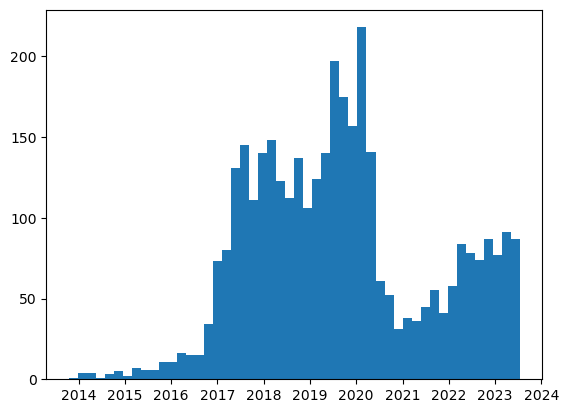

In [137]:
plt.hist(df["datetime"], bins=50)
plt.show()